<a href="https://colab.research.google.com/github/cap-vparekh/DataScience/blob/DEV/DecisionTree_Classification_Iris_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pruning: How to Prevent Overfitting
A very deep tree may memorize training data but perform poorly on test data.

There are two types of pruning:

* Pre-Pruning (Early Stopping): Stop the tree from growing after a certain depth or node count.
* Post-Pruning: Grow the full tree first, then cut off branches that don’t improve accuracy.


##Advantages vs Disadvantages
| Pros                                 | Cons                                      |
| ------------------------------------ | ----------------------------------------- |
| Easy to understand and interpret     | Prone to overfitting                      |
| Handles both numeric & categorical   | Not stable (small data change → big tree) |
| No need for scaling or normalization | Can be biased if one class dominates      |



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # all features
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Dataset overview
print("Dataset shape:", X.shape)
print("Feature names:", feature_names)
print("Target classes:", target_names)

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


##Why Cross-Validation?
When training a model, we usually split the dataset into training and testing sets. But that approach can be misleading if:
* The test set is too small or biased.
* The performance heavily depends on the train/test split.

Cross-validation solves this by giving a more reliable estimate of model performance using multiple splits.

##What Is 5-Fold Cross-Validation?
1. The dataset is divided into 5 equal parts (folds).
2. The model is trained on 4 folds and tested on the remaining 1 fold.
3. This process is repeated 5 times, each time using a different fold as the test set.
4. You get 5 accuracy scores, one from each run.

In [ ]:
# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Cross-Validation
dt = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dt, X, y, cv=5)
print("\n5-Fold CV scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
'''
It helps test our model on different slices of the data to avoid biased evaluation.
Instead of depending on one train/test split,
we test it five times on rotating data segments and average the results.
This gives us a better estimate of how the Decision Tree will perform in the real world.
'''


5-Fold CV scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV accuracy: 0.9533333333333334


'\nIt helps test our model on different slices of the data to avoid biased evaluation. \nInstead of depending on one train/test split, \nwe test it five times on rotating data segments and average the results.\nThis gives us a better estimate of how the Decision Tree will perform in the real world.\n'

##What is GridSearchCV?
* GridSearchCV stands for Grid Search with Cross-Validation.
* It systematically tries every combination of hyperparameter values you provide.
* For each combination, it runs cross-validation and stores the result.
* Finally, it tells you:
 * The best hyperparameters
 * The best model's cross-validation score

In [ ]:
# 5. Hyperparameter Tuning with GridSearchCV
# GridSearchCV is used to find the best combination of hyperparameters for the DecisionTreeClassifier.
# Think of it like a trial-and-error loop where we test different combinations to find the one that gives the best performance using cross-validation.

'''Two splitting criteria:
gini: Faster, simpler, default
entropy: Uses information gain, more precise but slower
'''
param_grid = {
    'criterion': ['gini', 'entropy'],#Lower Gini means purer split. Use Gini when you want a faster, simpler computation.
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5] #min_samples_split specifies the minimum number of samples a node must have to be split into two child nodes.
}
#Total combinations = 2 (criterion) × 5 (max_depth) × 4 (min_samples_split) = 40 models

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\nBest hyperparameters:", best_params) #best combination that gave the highest cross-validated accuracy
print("Best CV score from grid search:", grid_search.best_score_) #Mean accuracy across the 5 folds using the best combination
'''
Why is This Important in Real Projects?
| Without Tuning                      | With GridSearchCV                               |
| ----------------------------------- | ----------------------------------------------- |
| Risk of underfitting or overfitting | Finds a good bias–variance balance              |
| Uses default settings (not optimal) | Customizes model to the dataset                 |
| Single train-test split may mislead | Robust performance with k-fold cross-validation |
'''


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}
Best CV score from grid search: 0.9523809523809523


'\nWhy is This Important in Real Projects?\n| Without Tuning                      | With GridSearchCV                               |\n| ----------------------------------- | ----------------------------------------------- |\n| Risk of underfitting or overfitting | Finds a good bias–variance balance              |\n| Uses default settings (not optimal) | Customizes model to the dataset                 |\n| Single train-test split may mislead | Robust performance with k-fold cross-validation |\n'

In [ ]:


# 6. Final Model Training & Evaluation
best_dt = grid_search.best_estimator_
'''
It gives you the best Decision Tree model that was found during grid search.
This model has the optimal combination of hyperparameters
(e.g., criterion, max_depth, min_samples_split) that gave the highest cross-validation score.
'''


y_pred = best_dt.predict(X_test)
print("\nTest set accuracy:", accuracy_score(y_test, y_pred))
#Accuracy = (Number of correct predictions) ÷ (Total predictions)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test set accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


'\n[[TP TN FP]\n [FP TP FN]\n [FN FN TP]]\n'

In [ ]:

# 7. Feature Importances
'''
This code shows which features the decision tree found most useful in making predictions.
 - Every trained DecisionTreeClassifier stores a property called feature_importances_.
 - It gives a numerical score (between 0 and 1) for each feature.
 - The higher the score, the more influence that feature had in splitting nodes and making decisions.
'''

importances = best_dt.feature_importances_
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
#We create DataFrame to pair each feature name with its importance score.
#sort_values() sorts them from most important to least important, so we can easily see the key drivers.


print("Feature Importances:\n", df_importance)




Feature Importances:
              Feature  Importance
2  petal length (cm)    0.557093
3   petal width (cm)    0.442907
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


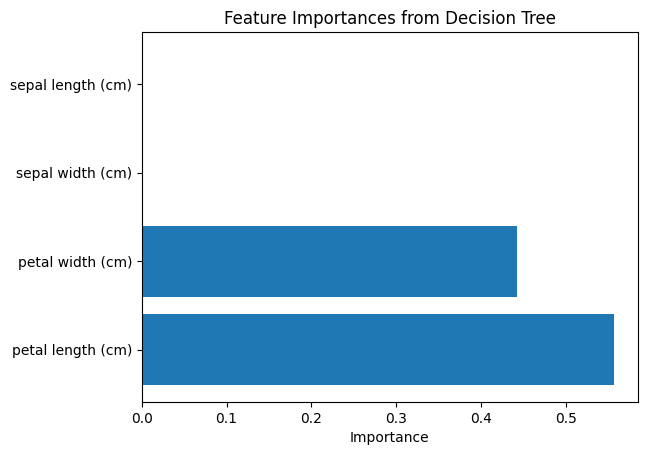

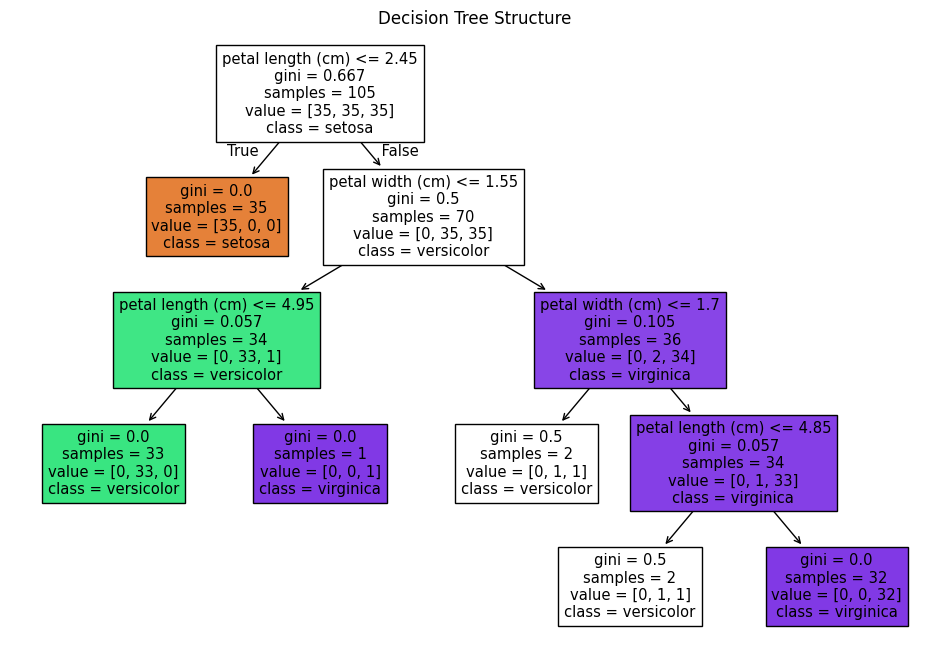

'\nQuestions for you:\n"What if you didn’t tune these values—how might the model behave?"\n"What does increasing min_samples_split do?"\n"Why might max_depth=None hurt performance?"\n'

In [ ]:
# 8. Plot Feature Importances
plt.figure()
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances from Decision Tree")
plt.show()

# 9. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    best_dt,
    feature_names=feature_names,
    class_names=target_names,
    filled=True
)
plt.title("Decision Tree Structure")
plt.show()

'''
Questions for you:
"What if you didn’t tune these values—how might the model behave?"
"What does increasing min_samples_split do?"
"Why might max_depth=None hurt performance?"
'''